# Projet TP Outil Numérique 
## Un exemple d’option dans un modèle de volatilité stochastique.

# Q.1

In [1]:
from time import time
import numpy as np
import scipy as scp
from statsmodels.graphics.gofplots import qqplot
from scipy.linalg import cholesky
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid",{"grid.linestyle": u"--","grid.color": "0.8"})


## Question 1
### Tracer des trajectoires

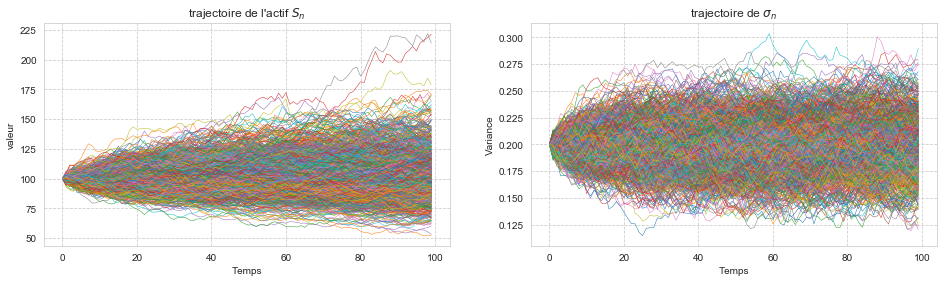

In [36]:
plt.figure(figsize = (16,9)) 
np.random.seed(seed = 100)
t_0 = time()
M = 1000 #Monte-Carlo
N = 100 #Temps
T = 1
Delta_t = T/N
# Initialisation :
S = np.zeros((N,M))
S_0 = 100
S[0] = S_0
sigma = np.zeros((N,M))
sigma_0 = 0.2
sigma[0] = sigma_0
v = np.zeros(N)
v_0 = np.power(sigma_0,2)
v[0] = v_0
r = 0.03
k = 2
a = 0.04
teta = 0.1
rho = -0.5
std_asympt = sigma_0*np.power(teta,2)/(2*k) 
# Générez M trajectoires de $S_{n}$ et $\sigma_{n}$ :
mu = 0
std = 1
for j in range(M):
     Z1 = np.random.normal(mu, std, N)
     Z2 = np.random.normal(mu, std, N)
     for i in range(N-1):
         S[i + 1, j] = S[i, j]*(1 + r*Delta_t + sigma[i, j]*Z1[i]*np.sqrt(Delta_t))
         v[i + 1] = v[i] + k*(a-v[i])*Delta_t + teta*sigma[i,j]*Z2[i]*np.sqrt(Delta_t)
         sigma[i + 1, j] = np.sqrt(v[i + 1])
# Tracez M trajectoires de $S_{n}$ et $\sigma_{n}$ :
# Plot des $S_{n}$ :
plt.subplot(2, 2, 1)
plt.plot(S, linewidth = 0.5)
plt.title("trajectoire de l'actif $S_{n}$")
plt.xlabel("Temps")
plt.ylabel("valeur")
plt.grid(True)

# Plot des $\sigma_{n}$ :
plt.subplot(2, 2, 2)
plt.plot(sigma, linewidth = 0.5)
plt.title("trajectoire de $\sigma_{n}$")
plt.xlabel("Temps")
plt.ylabel("Variance")
plt.grid(True)
plt.show()

## Question 2 
### Plot des Histogrammes $S_{100}$ et $v_{100}$ selon différents signes de $\rho$  

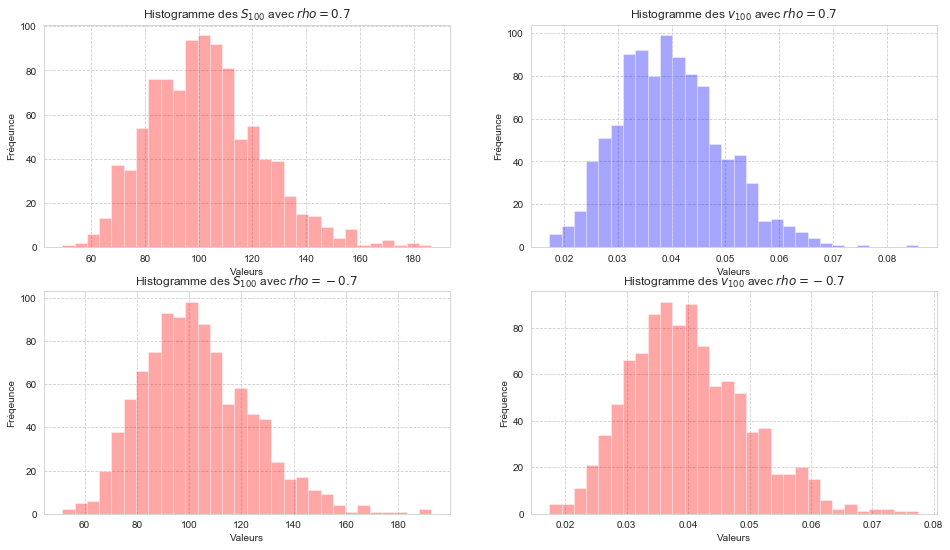

In [29]:
plt.figure(figsize = (16,9)) 
t_0 = time()

# Plot des histogrammes de S_{100} et v_{100} :
# Coefficient de corrélation positive :

rho = 0.7
for j in range(M):
     Z1 = np.random.normal(mu, std, N) 
     G1= np.random.normal(mu, std, N)   
     G2= np.random.normal(mu, std, N)   
     Z2 = rho*G1+np.sqrt(1-np.power(rho,2))*G2
     for i in range(N-1):
         S[i + 1, j] = S[i, j]*(1 + r*Delta_t + sigma[i, j]*Z1[i]*np.sqrt(Delta_t))
         v[i + 1] = v[i] + k*(a-v[i])*Delta_t + teta*sigma[i,j]*Z2[i]*np.sqrt(Delta_t)
         sigma[i + 1, j] = np.sqrt(v[i + 1])
S_100 = S[-1, :]
sigma_100 = sigma[-1, :]
v_100 = np.power(sigma_100,2)
plt.subplot(2, 2, 1)
plt.hist(S_100, bins = 30, density = False, facecolor = "red", alpha = 0.35) # density = False : fournit la fréquence d'apparition
plt.title("Histogramme des $S_{100}$ avec $rho = 0.7$")
plt.xlabel("Valeurs")
plt.ylabel("Fréqeunce")
plt.grid(True)
plt.subplot(2, 2, 2)
plt.hist(v_100, bins = 30, density = False, facecolor = "blue", alpha = 0.35)
plt.title("Histogramme des $v_{100}$ avec $rho = 0.7$")
plt.xlabel("Valeurs")
plt.ylabel("Fréqeunce")
plt.grid(True)
#-------------------------------------#
# Coefficient de corrélation négative :
rho = -0.7
for j in range(M):
     Z1 = np.random.normal(mu, std, N) 
     G1= np.random.normal(mu, std, N)   
     G2= np.random.normal(mu, std, N)   
     Z2 = rho*G1+np.sqrt(1-np.power(rho,2))*G2
     for i in range(N-1):
         S[i + 1, j] = S[i, j]*(1 + r*Delta_t + sigma[i, j]*Z1[i]*np.sqrt(Delta_t))
         v[i + 1] = v[i] + k*(a-v[i])*Delta_t + teta*sigma[i,j]*Z2[i]*np.sqrt(Delta_t)
         sigma[i + 1, j] = np.sqrt(v[i + 1])

S_100 = S[-1, :]
sigma_100 = sigma[-1, :]
v_100 = np.power(sigma_100,2)
plt.subplot(2, 2, 3)

plt.hist(S_100, bins = 30, density = False, facecolor = "red", alpha = 0.35)
plt.title("Histogramme des $S_{100}$ avec $rho = -0.7$")
plt.xlabel("Valeurs")
plt.ylabel("Fréqeunce")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.hist(v_100, bins = 30, density = False, facecolor = "red", alpha = 0.35)
plt.title("Histogramme des $v_{100}$ avec $rho = -0.7$")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(True)

plt.grid(True)
plt.show()

## Question 3
### Plot des nuages de points $S_{100}$ et $v_{100}$

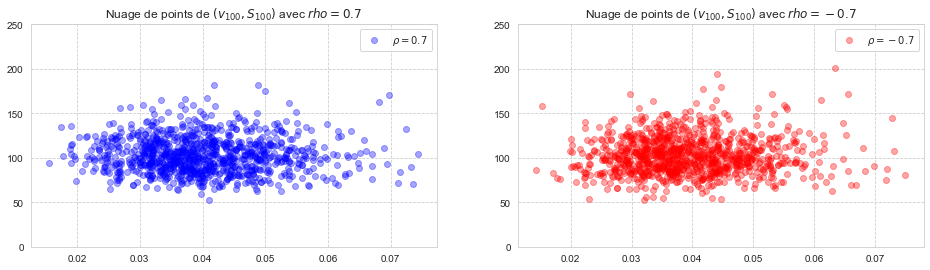

Temps écoulés : 4.953283309936523 s


In [37]:
plt.figure(figsize = (16,9)) 
t_0 = time()
# Plot des nuages de points de $v_{100}$ et $S_{100}$ :

#Corrélation positive
rho = 0.7
for j in range(M):
     Z1 = np.random.normal(mu, std, N) 
     G1= np.random.normal(mu, std, N)   
     G2= np.random.normal(mu, std, N)   
     Z2 = rho*G1+np.sqrt(1-np.power(rho,2))*G2
     for i in range(N-1):
         S[i + 1, j] = S[i, j]*(1 + r*Delta_t + sigma[i, j]*Z1[i]*np.sqrt(Delta_t))
         v[i + 1] = v[i] + k*(a-v[i])*Delta_t + teta*sigma[i,j]*Z2[i]*np.sqrt(Delta_t)
         sigma[i + 1, j] = np.sqrt(v[i + 1])

S_100 = S[-1, :]
sigma_100 = sigma[-1, :]
v_100 = np.power(sigma_100,2)
plt.subplot(2, 2, 1)
plt.plot(v_100, S_100, "o", label = r"$\rho = 0.7$", color = "blue", alpha = 0.35)
plt.title("Nuage de points de $(v_{100},S_{100})$ avec $rho = 0.7$")
plt.xlim()
plt.ylim(0,250)
plt.legend()
plt.grid(True)

#Corrélation négative
rho = -0.7
for j in range(M):
     Z1 = np.random.normal(mu, std, N) 
     G1= np.random.normal(mu, std, N)   
     G2= np.random.normal(mu, std, N)   
     Z2 = rho*G1+np.sqrt(1-np.power(rho,2))*G2
     for i in range(N-1):
         S[i + 1, j] = S[i, j]*(1 + r*Delta_t + sigma[i, j]*Z1[i]*np.sqrt(Delta_t))
         v[i + 1] = v[i] + k*(a-v[i])*Delta_t + teta*sigma[i,j]*Z2[i]*np.sqrt(Delta_t)
         sigma[i + 1, j] = np.sqrt(v[i + 1])

S_100 = S[-1, :]
sigma_100 = sigma[-1, :]
v_100 = np.power(sigma_100,2)
plt.subplot(2, 2, 2)
plt.plot(v_100, S_100, "o", label = r"$\rho = -0.7$", color = "red", alpha = 0.35)
plt.title("Nuage de points de $(v_{100},S_{100})$ avec $rho = -0.7$")
plt.xlim()
plt.ylim(0, 250)
plt.grid(True)
plt.legend()
plt.show()
print("Temps écoulés : %s s" %(time() - t_0))


### Que représente le coefficient $\rho$ ?
#### Le coefficient $\rho$ représente la corrélation entre vecteurs aléatoires $Z_1$ et $Z_2$ 
### Quel est son influence ?
#### Le fait d'avoir une corrélation négative montre que nos éléments suivent une tendance opposée et cela peut affecter le prix de l'actif  en d'autres termes on aura plus de chances d'avoir des pertes là où une corrélation positive induit une tendance à la hausse 

# Q2


## Question 1
### Payoff 1

In [33]:
t_0 = time()
rho = -0.5 # Coef de corrélation initial :
K = 100 # Strike
for j in range(M):
     G1=np.random.normal(mu, std, N)
     G2=np.random.normal(mu, std, N)
     Z1 = np.random.normal(mu, std, N)
     Z2 = (rho*G1) + np.sqrt(1-np.power(rho,2))*G2
     for i in range(N-1):
         S[i + 1, j] = S[i, j]*(1 + r*Delta_t + sigma[i, j]*Z1[i]*np.sqrt(Delta_t))
         v[i + 1] = v[i] + k*(a-v[i])*Delta_t + teta*sigma[i,j]*Z2[i]*np.sqrt(Delta_t)
         sigma[i + 1, j] = np.sqrt(v[i + 1])

def maximum(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
         if x[i] > 0:
            y[i] = x[i]
         else:
             y[i] = 0.0
    return(y)

H1 = maximum(S[-1, :] - K)
Payoff1 = np.exp(-r*T)*H1
V1 = np.mean(Payoff1)
std_V1 = np.std(Payoff1)
err_V1 = 1.96*std_V1/np.sqrt(M)
print("\n")
print("Calcul du prix selon la méthode de Monte-Carlo : {:.4f}" .format(V1))
print("\n")
print("Intervalle de confiance : [ " , format(V1 - err_V1, '.4f') , ";" , format(V1 + err_V1
, '.4f') , "]")
print("\n")



Calcul selon la méthode de Monte-Carlo : 9.6906


Intervalle de confiance : [  8.8217 ; 10.5595 ]


Avec une erreur standard : 0.4436




## Question 2
### Payoff2


In [34]:
t_0 = time()

H2 = maximum(S.mean(0) - K)
Payoff2 = np.exp(-r*T)*H2
V2 = np.mean(Payoff2)
std_V2 = np.std(Payoff2)
err_V2 = 1.96*std_V2/np.sqrt(M)
print("\n")
print("Calcul du prix selon la méthode de Monte-Carlo : {:.4f}" .format(V2))
print("\n")
print("Intervalle de confiance : [ " , format(V2 - err_V2, '.4f') , ";" , format(V2 + err_V2
, '.4f') , "]")
print("\n")



Calcul du prix selon la méthode de Monte-Carlo : 5.3788


Intervalle de confiance : [  4.8985 ; 5.8592 ]




## Question 3
### Payoff3 

In [35]:
t_0 = time()

H3 = maximum(np.amax(S,0) - K) 
Payoff3 = np.exp(-r*T)*H3
V3 = np.mean(Payoff3)
std_V3 = np.std(Payoff3)
err_V3 = 1.96*std_V3/np.sqrt(M)
print("\n")
print("Calcul du prix selon la méthode de Monte-Carlo : {:.4f}" .format(V3))
print("\n")
print("Intervalle de confiance : [" , format(V3 - err_V3, '.4f') , ";" , format(V3 + err_V3,
'.4f') , "]")
print("\n")



Calcul du prix selon la méthode de Monte-Carlo : 17.1046


Intervalle de confiance : [ 16.1804 ; 18.0288 ]




# Q3

### D'après le cours on a